# kNN 基础

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
raw_data_X = [
    [3.393533211, 2.331273381],
    [3.110073483, 1.781539638],
    [1.343808831, 3.368360954],
    [3.582294042, 4.679179110],
    [2.280362439, 2.866990263],
    [7.423436942, 4.696522875],
    [5.745051997, 3.533989803],
    [9.172168622, 2.511101045],
    [7.792783481, 3.424088941],
    [7.939820817, 0.791637231]
]  # 两列分别代表肿瘤的长和宽
raw_data_y = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1] # 0是良性肿瘤，1是恶性肿瘤

In [5]:
X_train = np.array(raw_data_X)
y_train = np.array(raw_data_y)

In [6]:
X_train

array([[3.39353321, 2.33127338],
       [3.11007348, 1.78153964],
       [1.34380883, 3.36836095],
       [3.58229404, 4.67917911],
       [2.28036244, 2.86699026],
       [7.42343694, 4.69652288],
       [5.745052  , 3.5339898 ],
       [9.17216862, 2.51110105],
       [7.79278348, 3.42408894],
       [7.93982082, 0.79163723]])

In [7]:
y_train

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

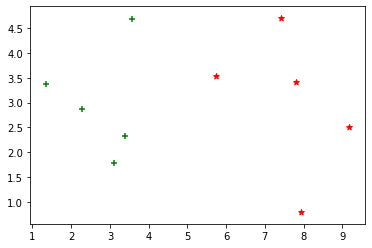

In [8]:
plt.scatter(X_train[y_train==0,0], X_train[y_train==0,1], color='g', marker="+") # X_train[y_train==0,0]表示从X_train中取y_train中等于0的索引对应的行的第0列
plt.scatter(X_train[y_train==1,0], X_train[y_train==1,1], color='r', marker="*")
plt.show()

In [9]:
x = np.array([8.093607318, 3.365731514])

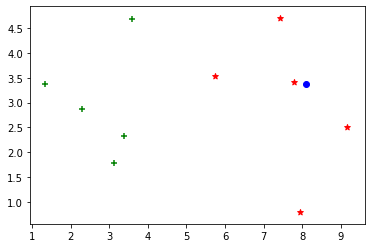

In [10]:
plt.scatter(x[0], x[1], color="blue", marker="o")
plt.scatter(X_train[y_train==0,0], X_train[y_train==0,1], color='g', marker="+")
plt.scatter(X_train[y_train==1,0], X_train[y_train==1,1], color='r', marker="*")
plt.show()

## kNN的过程

In [24]:
x # x是待预测的点，从上面图可以看出属于y_train中的1，下面来用理论证实下

array([8.09360732, 3.36573151])

In [23]:
from math import sqrt
distances = []
# 求出每个点到制定点的距离，所有的距离组成距离数组distances
for x_train in X_train:
    d = sqrt(np.sum((x_train - x)**2)) # np.sum默认沿着行方向(axis=0)，每行算一个点去求和
    distances.append(d)
distances

[4.812566907609877,
 5.229270827235305,
 6.749798999160064,
 4.6986266144110695,
 5.83460014556857,
 1.4900114024329525,
 2.354574897431513,
 1.3761132675144652,
 0.3064319992975,
 2.5786840957478887]

In [12]:
np.argsort(distances) # 排序后返回元素的索引

array([8, 7, 5, 6, 9, 3, 0, 1, 4, 2], dtype=int64)

In [13]:
nearest = np.argsort(distances) # 排序后返回元素的索引
nearest

array([8, 7, 5, 6, 9, 3, 0, 1, 4, 2], dtype=int64)

In [14]:
k = 6 # K近邻算法，取最近的6个点

In [15]:
topK_y = [y_train[i] for i in nearest[:k]]  # 取最近的k个点的下表，对应着去y_train中把指定下标的元素取出来

In [16]:
topK_y  # 最近的6个点，5个对应的结果都是同一类

[1, 1, 1, 1, 1, 0]

In [17]:
# 下面对topk_y中的元素分布做一下统计
from collections import Counter
Counter(topK_y)

Counter({1: 5, 0: 1})

In [18]:
votes = Counter(topK_y)

In [19]:
votes.most_common(2) # 找出票数最多的n个元素，2就是n的具体值

[(1, 5), (0, 1)]

In [20]:
votes.most_common(1) # 找出票数最多的n个元素，1就是n的具体值

[(1, 5)]

In [21]:
predict_y = votes.most_common(1)[0][0]  # 注意取出具体的预测的值的方法

In [22]:
predict_y

1